# PyMC3を用いたCOVID-19の時系列ダイナミクスのベイジアンモデリング

本ノートブックでは、COVID-19の疾病パラメータを予測するためにどのようにPyMC3を用いるのかを説明します。

ここでは以下の処理を行います。
- SIRモデルのλとμを推定するためにベイジアン推論を用いる
- 任意の`t`におけるI(t)を推定するために上のパラメータを使用する
- `R0`(基本再生産数)を計算する

<table>
  <tr><th>作者</th><th>Databricks Japan</th></tr>
  <tr><td>日付</td><td>2021/07/12</td></tr>
  <tr><td>バージョン</td><td>1.0</td></tr>
  <tr><td>クラスター</td><td>8.3ML</td></tr>
</table>
<img style="margin-top:25px;" src="https://sajpstorage.blob.core.windows.net/workshop20210205/databricks-logo-small-new.png" width="140">

**参考情報**
- [PyMC3を用いたCOVID\-19の時系列ダイナミクスのベイジアンモデリング \- Qiita](https://qiita.com/taka_yayoi/items/4a0316853687957f6526)
- [Using Bayesian Statistics and PyMC3 to Model the Temporal Dynamics of COVID\-19 \- The Databricks Blog](https://databricks.com/blog/2021/01/06/bayesian-modeling-of-the-temporal-dynamics-of-covid-19-using-pymc3.html)
- [SIRモデル \- Wikipedia](https://ja.wikipedia.org/wiki/SIR%E3%83%A2%E3%83%87%E3%83%AB)
- [aseyboldt/sunode: Solve ODEs fast, with support for PyMC3](https://github.com/aseyboldt/sunode)
- [Rでデータの密度を見る（カーネル密度関数・ラグプロット） \- Qiita](https://qiita-user-contents.imgix.net/https%3A%2F%2Fi.imgur.com%2FTo3Ytuz.png?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=bba76d47ca708cedee47d53ae939f5ad)
- [新型コロナウイルス 日本国内の感染者数・死者数・重症者数データ｜NHK特設サイト](https://www3.nhk.or.jp/news/special/coronavirus/data-all/)

## ライブラリのインストール

In [0]:
%sh

conda install -y -c conda-forge sunode plotly pymc3

Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Collecting package metadata (repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

 environment location: /databricks/conda/envs/databricks-ml

 added / updated specs:
 - plotly
 - pymc3
 - sunode


The following packages will be downloaded:

 package | build
 ---------------------------|-----------------
 arviz-0.11.1 | pyhd8ed1ab_0 1.4 MB conda-forge
 binutils_impl_linux-64-2.33.1| he1b5a44_7 8.6 MB conda-forge
 binutils_linux-64-2.33.1 | h9595d00_17 21 KB conda-forge
 ca-certificates-2021.5.30 | ha878542_0 136 KB conda-forge
 certifi-2021.5.30 | py38h578d9bd_0 141 KB conda-forge
 cftime-1.3.0 | py38h0b5ebd8_0 310 KB conda-forge
 curl-7.71.1 | he644dc0_3 140 KB conda-forge
 fastprogress-1.0.0 | py_0 15 KB conda-forge
 gcc_impl_linux-64-7.3.0 | habb00fd_1 41.9 MB
 gcc_linux-64-7.3.0 | h553295d_17 21 KB conda-forge
 gmpy2-2.1.0b1 | py38h04dde30_0 212 KB conda-forge
 gxx_impl_linux-64-7.3.0 | hdf63c60_1 15.0 MB
 gxx_linux-64-7.3.0 | h553295d_17 21 KB conda-forge
 hdf4-4.2.13 | 0 969 KB conda-forge
 jax-0.2.17 | pyhd8ed1ab_0 579 KB conda-forge
 jaxlib-0.1.67 | py38h578d9bd_0 38.5 MB conda-forge
 libblas-3.8.0 | 14_mkl 10 KB conda-forge
 libcblas-3.8.0 | 14_mkl 10 KB conda-forge
 libcurl-7.71.1 | hcdd3856_3 302 KB conda-forge
 libgpuarray-0.7.6 | h14c3975_1003 263 KB conda-forge
 liblapack-3.8.0 | 14_mkl 10 KB conda-forge
 libllvm10-10.0.1 | he513fc3_3 26.4 MB conda-forge
 libnetcdf-4.7.3 | hb80b6cc_0 897 KB
 libssh2-1.9.0 | hab1572f_5 225 KB conda-forge
 llvmlite-0.34.0 | py38h4f45e52_2 312 KB conda-forge
 metis-5.1.0 | h58526e2_1006 4.1 MB conda-forge
 mpc-1.1.0 | h04dde30_1006 149 KB conda-forge
 mpfr-4.0.2 | he80fd80_0 673 KB conda-forge
 mpmath-1.2.1 | pyhd8ed1ab_0 437 KB conda-forge
 netcdf4-1.5.3 | py38hbf33ddf_0 527 KB
 numba-0.51.2 | py38hc5bc63f_0 3.7 MB conda-forge
 opt_einsum-3.3.0 | pyhd8ed1ab_1 53 KB conda-forge
 plotly-5.1.0 | pyhd8ed1ab_0 6.7 MB conda-forge
 pygpu-0.7.6 |py38hab2c0dc_1002 642 KB conda-forge
 pymc3-3.10.0 | pyhd8ed1ab_2 1.4 MB conda-forge
 python-flatbuffers-2.0 | pyhd8ed1ab_0 28 KB conda-forge
 python_abi-3.8 | 2_cp38 4 KB conda-forge
 suitesparse-5.7.2 | h717dc36_0 2.4 MB conda-forge
 sundials-5.3.0 | h0186668_0 894 KB conda-forge
 sunode-0.1.1 | py38h1e0a361_0 154 KB conda-forge
 sympy-1.8 | py38h578d9bd_0 11.2 MB conda-forge
 tbb-2020.2 | hc9558a2_0 1.4 MB conda-forge
 tenacity-8.0.0 | pyhd8ed1ab_0 20 KB conda-forge
 theano-pymc-1.0.11 | py38hadf7658_0 3.6 MB conda-forge
 xarray-0.18.2 | pyhd8ed1ab_0 599 KB conda-forge
 ------------------------------------------------------------
 Total: 174.7 MB

The following NEW packages will be INSTALLED:

 arviz conda-forge/noarch::arviz-0.11.1-pyhd8ed1ab_0
 binutils_impl_lin~ conda-forge/linux-64::binutils_impl_linux-64-2.33.1-he1b5a44_7
 binutils_linux-64 conda-forge/linux-64::binutils_linux-64-2.33.1-h9595d00_17
 cftime conda-forge/linux-64::cftime-1.3.0-py38h0b5ebd8_0
 curl conda-forge/linux-64::curl-7.71.1-he644dc0_3
 fastprogress conda-forge/noarch::fastprogress-1.0.0-py_0
 gcc_impl_linux-64 pkgs/main/linux-64::gcc_impl_linux-64-7.3.0-habb00fd_1
 gcc_linux-64 conda-forge/linux-64::gcc_linux-64-7.3.0-h553295d_17
 gmpy2 conda-forge/linux-64::gmpy2-2.1.0b1-py38h04dde30_0
 gxx_impl_linux-64 pkgs/main/linux-64::gxx_impl_linux-64-7.3.0-hdf63c60_1
 gxx_linux-64 conda-forge/linux-64::gxx_linux-64-7.3.0-h553295d_17
 hdf4 conda-forge/linux-64::hdf4-4.2.13-0
 jax conda-forge/noarch::jax-0.2.17-pyhd8ed1ab_0
 jaxlib conda-forge/linux-64::jaxlib-0.1.67-py38h578d9bd_0
 libblas conda-forge/linux-64::libblas-3.8.0-14_mkl
 libcblas conda-forge/linux-64::libcblas-3.8.0-14_mkl
 libcurl conda-forge/linux-64::libcurl-7.71.1-hcdd3856_3
 libgpua

`sympy==1.8`ではエラーとなるため1.4にします。

In [0]:
%pip install sympy==1.4

Python interpreter will be restarted.
Collecting sympy==1.4
 Downloading sympy-1.4-py2.py3-none-any.whl (5.3 MB)
Requirement already satisfied: mpmath>=0.19 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-fc64465d-3f82-4ddb-98da-3654742eafe4/lib/python3.8/site-packages (from sympy==1.4) (1.2.1)
Installing collected packages: sympy
 Attempting uninstall: sympy
 Found existing installation: sympy 1.8
 Uninstalling sympy-1.8:
 Successfully uninstalled sympy-1.8
Successfully installed sympy-1.4
Python interpreter will be restarted.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.figure_factory as ff
import scipy.stats
import pymc3 as pm
import arviz as az
import sunode
import sunode.wrappers.as_theano
from pymc3.ode import DifferentialEquation
import theano.tensor as tt
import theano
import datetime
import shelve
from datetime import datetime as dt
import time

## COVID_dataオブジェクトの生成

In [0]:
# -------- 使用方法 --------#
# covid_obj = COVID_data('US', Population=328.2e6)
# covid_obj.get_dates(data_begin='7/11/20', data_end='7/20/20')
# sir_model = SIR_model(covid_obj)
# likelihood = {'distribution': 'lognormal', 'sigma': 2}
# prior= {'lam': 0.4, 'mu': 1/8, lambda_std', 0.5 'mu_std': 0.5 }
# sir_model.run_SIR_model(n_samples=20, n_tune=10, likelihood=likelihood)
np.random.seed(0)

class COVID_data():

    def __init__(self, country='US', Population = 328.2e6):

        # 感染者数データ
        confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
        self.confirmed_cases = pd.read_csv(confirmed_cases_url, sep=',')
        
        # 死者数データ
        deaths_url =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
        self.deaths = pd.read_csv(deaths_url, sep=',')
        path_to_save = ''

        # ------------------------- 推定対象の国 -------------------
        self.country = country
        self.N = Population   # 国の人口
                         # ドイツ - 83.7e6
                         # アメリカ - 328.2e6
                         # 日本 - 126.3e6

    def get_dates(self, data_begin='7/11/20', data_end='7/20/20'):

        # ------------------------- 推定期間 ----------------------#
        self.data_begin = data_begin  # 昨日までのデータを取得
        self.data_end = data_end
        self.num_days_to_predict = 14
        confirmed_cases = self.confirmed_cases
        country = self.country
        self.cases_country = confirmed_cases.loc[confirmed_cases["Country/Region"] == country]
        self.cases_obs = np.array(confirmed_cases.loc[confirmed_cases["Country/Region"] == country, data_begin:data_end])[0]

        print("------------ Cases for selected period ----------- ",self.cases_obs)

        date_data_end = confirmed_cases.loc[confirmed_cases["Country/Region"] == self.country, data_begin:data_end].columns[-1]
        month, day, year = map(int,date_data_end.split('/'))
        date_data_end = datetime.date(year+2000, month, day)
        date_today = date_data_end + datetime.timedelta(days=1)
        print("------------- Cases yesterday ({}): {} and day before yesterday: {} ------------".format(date_data_end.isoformat(), *self.cases_obs[:-3:-1]))
        self.num_days = len(self.cases_obs)

        day_before_start = dt.strptime(data_end, '%m/%d/%y') + datetime.timedelta(days=-1)
        day_before_start_cases = np.array(self.cases_country.loc[:, day_before_start.strftime('%-m/%-d/%-y')])
        print("------------ Day before start and cases for that date ------------", day_before_start, day_before_start_cases)
        future_days_begin = dt.strptime(data_end, '%m/%d/%y') + datetime.timedelta(days=1)
        future_days_end = future_days_begin + datetime.timedelta(days=self.num_days_to_predict)
        self.future_days_begin_s = future_days_begin.strftime('%-m/%-d/%-y')
        self.future_days_end_s = future_days_end.strftime('%-m/%-d/%-y')
        print("------------- Future date begin and end -------------",self.future_days_begin_s, self.future_days_end_s)
        self.future_days = np.array(self.cases_country.loc[:, self.future_days_begin_s : self.future_days_end_s])[0]
        print("------------- Future days cases ------------", self.future_days)

## SIRモデルの生成

**注意** 59行目の`cores=2`の値をお使いのクラスターのコア数に合わせてください

In [0]:
class SIR_model():

    def __init__(self, covid_data) :

        # ------------------------- Covid_data オブジェクト -----------------------#
        self.covid_data = covid_data
        # ------------------------- SIRモデルのセットアップ、しかし、実行する際には明示的に呼び出す必要があります ------------------------#
        self.setup_SIR_model()

    def SIR_non_normalized(self, y, t, p):
        ds = -p[0] * y[0] * y[1] /self.covid_data.N
        di = p[0] * y[0] * y[1] / self.covid_data.N  -  p[1] * y[1]
        return [ds, di]

    def setup_SIR_model(self):
        self.time_range = np.arange(0,len(self.covid_data.cases_obs),1)
        self.I0 = self.covid_data.cases_obs[0]
        self.S0 = self.covid_data.N - self.I0

        # SIRモデル
        self.sir_model_non_normalized = DifferentialEquation(
            func=self.SIR_non_normalized,
            times=self.time_range[1:],
            n_states=2,
            n_theta=2,
            t0=0)

    def run_SIR_model(self, n_samples, n_tune, likelihood, prior):
        # ------------------------- メタデータ --------------------------------#
        now = dt.now()
        timenow = now.strftime("%d-%m-%Y_%H:%M:%S")
        self.filename = 'sir_' + self.covid_data.data_begin.replace('/','-') + '_' + \
            self.covid_data.data_end.replace('/','-') + '_' + timenow
        self.likelihood = likelihood
        self.n_samples = n_samples
        self.n_tune = n_tune
        self.likelihood = likelihood
        self.prior = prior
        # ------------------------ モデルの実行中にメタデータを書き出します -------------------#
        metadata_db_filename = 'metadata_db.db'

        t = time.time()

        with pm.Model() as model4:
            sigma = pm.HalfCauchy('sigma', likelihood['sigma'], shape=1)
            lam = pm.Lognormal('lambda', prior['lam'], prior['lambda_std'])
            mu = pm.Lognormal('mu', prior['mu'], prior['mu_std'])

            res = self.sir_model_non_normalized(y0=[self.S0, self.I0], theta=[lam, mu])

            if(likelihood['distribution'] == 'lognormal'):
                Y = pm.Lognormal('Y', mu=pm.math.log(res.take(0, axis=1)), sigma=sigma, observed=self.covid_data.cases_obs[1:])
            else:
                Y = pm.StudentT( "Y",  nu=likelihood['nu'],       # データの尤度分布
                        mu=res.take(0, axis=1),     # 尤度分布の平均値、これらはSIRの予測となります
                        sigma=sigma,
                        observed=cases_obs[1:]
                        )
            trace = pm.sample(self.n_samples, tune=self.n_tune, target_accept=0.9, cores=2) # コア数指定
            data = az.from_pymc3(trace=trace)

        t1 = time.time() - t
        az.plot_posterior(data, round_to=2, credible_interval=0.95)
        axes = az.plot_trace(trace)
        fig = axes.ravel()[0].figure
        fig.savefig(self.filename)

        self.metadata_db = shelve.open(metadata_db_filename)
        self.metadata_db[self.filename] = {'type': 'sir', 'samples': n_samples,
                                    'tune': n_tune,
                                    'elapsed_time': t1,
                                    'finished': dt.now().strftime("%d-%m-%Y_%H:%M:%S"),
                                    'likelihood': likelihood,
                                    'prior': prior }
        self.metadata_db.close()

sunodeモジュールを用いるケース

**注意** 84行目の`cores=24`の値をお使いのクラスターのコア数に合わせてください

In [0]:
class SIR_model_sunode():

    def __init__(self, covid_data) :

        # ------------------------- Covid_data オブジェクト -----------------------#
        self.covid_data = covid_data
        # ------------------------- SIRモデルのセットアップ、しかし、実行する際には明示的に呼び出す必要があります ------------------------#
        self.setup_SIR_model()

    def SIR_sunode(self, t, y, p):
        return {
            'S': -p.lam * y.S * y.I,
            'I': p.lam * y.S * y.I - p.mu * y.I,
        }

    def setup_SIR_model(self):
        self.time_range = np.arange(0,len(self.covid_data.cases_obs),1)
        self.I0 = self.covid_data.cases_obs[0]
        self.S0 = self.covid_data.N - self.I0
        self.S_init = self.S0 / self.covid_data.N
        self.I_init = self.I0 / self.covid_data.N
        self.cases_obs_scaled = self.covid_data.cases_obs / self.covid_data.N


    def run_SIR_model(self, n_samples, n_tune, likelihood, prior):
        # ------------------------- メタデータ --------------------------------#
        now = dt.now()
        timenow = now.strftime("%d-%m-%Y_%H:%M:%S")
        self.filename = 'sir_' + self.covid_data.data_begin.replace('/','-') + '_' + \
            self.covid_data.data_end.replace('/','-') + '_' + timenow
        self.likelihood = likelihood
        self.n_samples = n_samples
        self.n_tune = n_tune
        self.likelihood = likelihood
        self.prior = prior
        # ------------------------ モデルの実行中にメタデータを書き出します -------------------#
        metadata_db_filename = 'metadata_db.db'

        t = time.time()

        with pm.Model() as model4:
            sigma = pm.HalfCauchy('sigma', self.likelihood['sigma'], shape=1)
            lam_mu = np.log(self.prior['lam']) + self.prior['lambda_std']**2
            mu_mu = np.log(self.prior['mu']) + self.prior['mu_std']**2
            lam = pm.Lognormal('lambda', lam_mu , self.prior['lambda_std']) # 1.5, 1.5
            mu = pm.Lognormal('mu', mu_mu, self.prior['mu_std'])           # 1.5, 1.5

            res, _, problem, solver, _, _ = sunode.wrappers.as_theano.solve_ivp(
            y0={
    	    # ODEの初期条件、それぞれの変数はtheanoあるいはnumpy変数とshapeを指定する必要があります。
    	    # このdictはネストできます。
                'S': (self.S_init, ()),
                'I': (self.I_init, ()),},
            params={
    	    # ODEのパラメーターです。sunodeはtheano変数の微分のみを計算します。ここでもshapeを指定する必要があります。
            # numpy変数は自動的に推定されます。
    	    # このdictはネストできます。
                'lam': (lam, ()),
                'mu': (mu, ()),
                '_dummy': (np.array(1.), ())},
            # sympy変数を用いてODEの右辺を計算する関数です。
            rhs=self.SIR_sunode,
            # ソリューションにアクセスしたいタイムポイントです。
            tvals=self.time_range,
            t0=self.time_range[0]
            )
            if(likelihood['distribution'] == 'lognormal'):
                I = pm.Lognormal('I', mu=res['I'], sigma=sigma, observed=self.cases_obs_scaled)
            elif(likelihood['distribution'] == 'normal'):
                I = pm.Normal('I', mu=res['I'], sigma=sigma, observed=self.cases_obs_scaled)
            elif(likelihood['distribution'] == 'students-t'):
                I = pm.StudentT( "I",  nu=likelihood['nu'],       # データの尤度分布
                        mu=res['I'],     # 尤度分布の平均値、これらはSIRの予測となります
                        sigma=sigma,
                        observed=self.cases_obs_scaled
                        )

            theano.printing.Print('S')(res['S'])
            print('Problem',problem)
            print('Solver',solver)

            R = 1 - (res['I'] + res['S'])
            #S = 1 - (res['I'][1:])
            #theano.printing.Print('R')(R)
            R0 = pm.Deterministic('R0',lam/mu)

            step = pm.Metropolis()
            trace = pm.sample(self.n_samples, tune=self.n_tune, chains=4, cores=24) # コア数指定
            data = az.from_pymc3(trace=trace)

        t1 = time.time() - t
        az.plot_posterior(data, round_to=2, point_estimate='mode', credible_interval=0.95)
        axes = az.plot_trace(trace)
        fig = axes.ravel()[0].figure
        fig.savefig(self.filename)
        
        fig = ff.create_distplot([trace['R0']], bin_size=0.5, group_labels=['x'])

        # タイトルの追加
        fig.update_layout(title_text='R0(基本再生産数)の曲線、ラグプロット')
        fig.update_xaxes(range=[0,7])
              

        self.metadata_db = shelve.open(metadata_db_filename)
        self.metadata_db[self.filename] = {'type': 'sir', 'samples': n_samples,
                                    'tune': n_tune,
                                    'elapsed_time': t1,
                                    'finished': dt.now().strftime("%d-%m-%Y_%H:%M:%S"),
                                    'likelihood': likelihood,
                                    'prior': prior }
        self.metadata_db.close()
        return(fig)

## SIRモデルによるパラメーター推定、R0の予測

### 日本

以下の例では2021/1/1から5/31の期間のデータで推定、予測を行っています。

------------ Cases for selected period ----------- [239068 242097 245293 248625 253571 259521 267084 274947 282737 288818
 293746 298321 304140 310734 317871 324942 330715 335605 340989 346508
 352129 357174 361928 365899 368684 372545 376482 380644 384180 387499
 390166 391956 394269 396900 399492 401858 404128 405765 406992 408550
 410434 412125 413441 414803 416154 417127 418435 419896 421421 422718
 423952 424988 425725 426828 427732 428816 429873 431093 432090 432778
 433700 434944 436093 437222 437634 439356 439977 441152 442411 443714
 444977 446312 447287 448000 449142 450687 452147 453616 455212 456318
 457104 458621 460595 462506 464483 466563 468346 469636 471777 474641
 477239 479953 482704 485226 486792 489407 492860 496351 499831 503537
 506237 508350 511799 517281 521796 526307 531109 535220 537494 542467
 547836 553362 558376 563998 568621 571904 576870 580666 588580 593264
 599253 605150 609625 613822 617890 622273 628319 635568 642146 647003
 653363 660884 667251 673539 679870 685135 688873 694077 699931 705641
 710895 715880 719925 722668 726586 731071 735234 738935 742539 745392
 747188]
------------- Cases yesterday (2021-05-31): 747188 and day before yesterday: 745392 ------------
------------ Day before start and cases for that date ------------ 2021-05-30 00:00:00 [745392]
------------- Future date begin and end ------------- 6/1/21 6/15/21
------------- Future days cases ------------ [749829 752865 755713 758290 760953 762980 764185 766068 768313 770357
 772293 774240 775624 776565 777979]
S __str__ = [0.99810714 0.97976982 0.84305645 0.40445411 0.11100463 0.03709845
 0.01786193 0.01130182 0.00853446 0.00719366 0.0064857 0.00609171
 0.00586534 0.00573274 0.00565415 0.00560725 0.00557913 0.00556224
 0.00555207 0.00554594 0.00554225 0.00554002 0.00553868 0.00553787
 0.00553738 0.00553709 0.00553691 0.0055368 0.00553674 0.0055367
 0.00553668 0.00553666 0.00553665 0.00553665 0.00553665 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664 0.00553664
 0.00553664]
Problem <sunode.symode.problem.SympyProblem object at 0x7fc531330940>
Solver <sunode.solver.AdjointSolver object at 0x7fc5241c1a60>
/local_disk0/.ephemeral_nfs/envs/pythonEnv-fc64465d-3f82-4ddb-98da-3654742eafe4/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning:

In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 24 jobs)
NUTS: [mu, lambda, sigma]
█Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 238 seconds.
/local_d

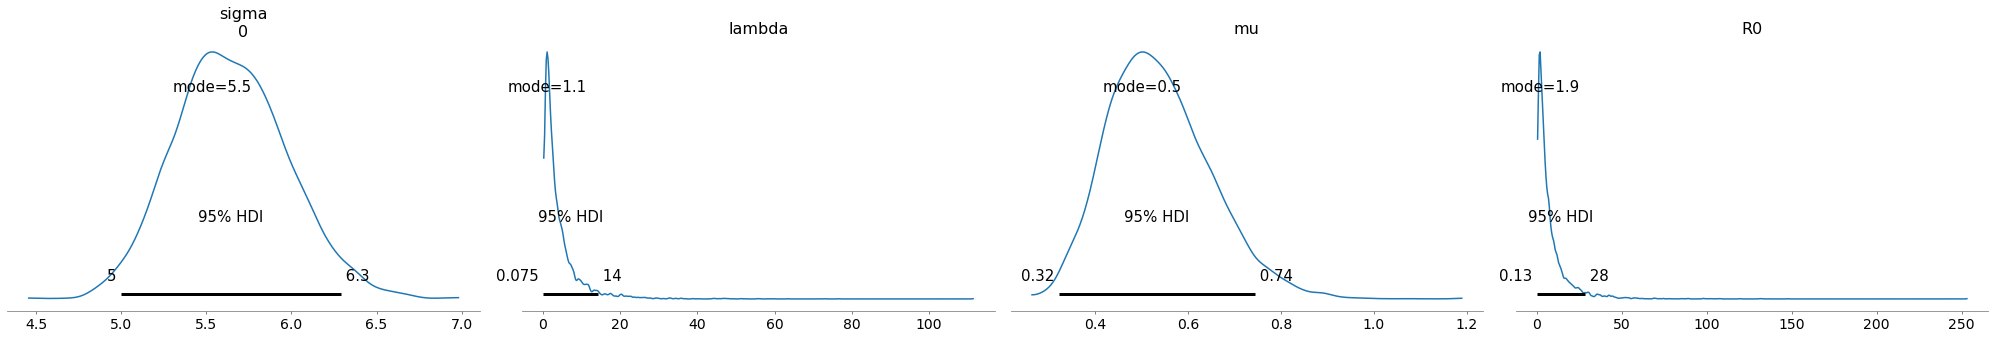

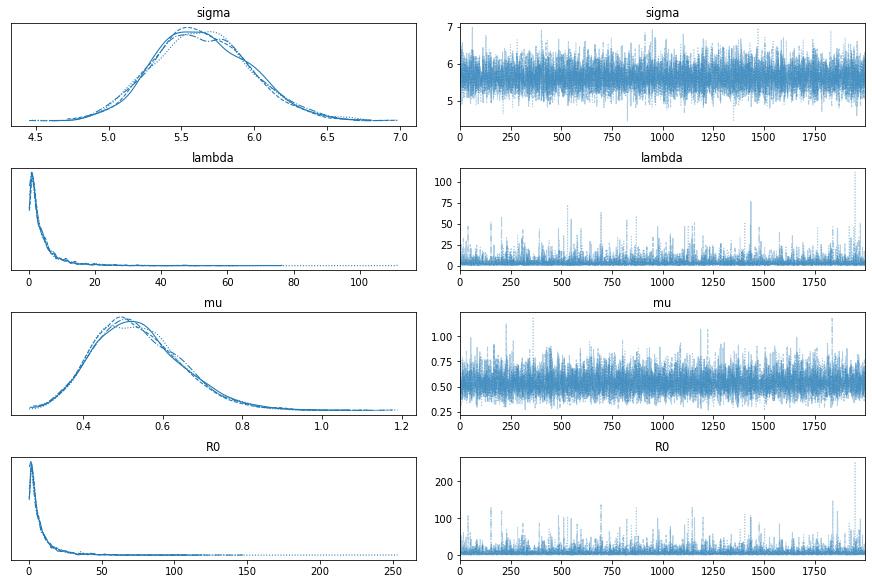

In [0]:
covid_obj = COVID_data('Japan', Population=126.3e6)
covid_obj.get_dates(data_begin='1/1/21', data_end='5/31/21')

# sunodeを使用
sir_model = SIR_model_sunode(covid_obj)
# 尤度分布
likelihood = {'distribution': 'lognormal', 
              'sigma': 2}
# 事前確率
prior = {'lam': 1.0, 
         'mu': 0.5, 
         'lambda_std': 1.0,
         'mu_std': 0.2 }
fig1 = sir_model.run_SIR_model(n_samples=2000, n_tune=1000, likelihood=likelihood, prior=prior)

R0(基本再生産数)の分布をヒストグラム、曲線、ラグプロット形式で表示

In [0]:
fig1.show()

### アメリカ

------------ Cases for selected period ----------- [20254160 20554622 20763475 20947480 21182522 21438159 21716496 22011753
 22272720 22486135 22700799 22927766 23158067 23393833 23636613 23838471
 24016402 24160000 24336216 24519477 24713333 24904093 25074852 25206050
 25357727 25505353 25659314 25828118 25994731 26137190 26249342 26384317
 26499620 26621311 26745317 26879739 26983915 27073661 27164099 27259364
 27354614 27460378 27560048 27647267 27712402 27766681 27829179 27899318
 27969229 28048511 28120207 28177359 28233518 28305788 28380537 28458041
 28535390 28600016 28651438 28709536 28766634 28833825 28901885 28968304
 29026558 29067631 29112548 29170215 29228110 29290581 29352094 29405125
 29443403 29499944 29553952 29613232 29673607 29735258 29790777 29824599
 29876035 29929723 30016661 30084207 30161584 30224426 30267649 30336922
 30398351 30465116 30544235 30614122 30677383 30712516 30789920 30850594
 30925615 31005509 31088219 31154906 31201415 31271490 31349456 31424859
 31499167 31579238 31631770 31673891 31741996 31802945 31865800 31933078
 31995489 32048984 32081137 32128705 32179541 32234691 32292942 32350861
 32396252 32425655 32476146 32516869 32561573 32609130 32657260 32690935
 32712362 32749160 32782822 32818648 32856724 32898984 32927841 32944716
 32973337 33001126 33030427 33060633 33088579 33108377 33121245 33147060
 33169799 33193775 33221223 33243082 33255083 33261817 33267592]
------------- Cases yesterday (2021-05-31): 33267592 and day before yesterday: 33261817 ------------
------------ Day before start and cases for that date ------------ 2021-05-30 00:00:00 [33261817]
------------- Future date begin and end ------------- 6/1/21 6/15/21
------------- Future days cases ------------ [33290532 33307449 33326529 33343379 33357285 33362680 33378176 33391189
 33409836 33424381 33449080 33457308 33462085 33474815 33486120]
S __str__ = [0.93828714 0.59125426 0.17598427 0.05077437 0.02129876 0.01228523
 0.00875557 0.00712362 0.00628645 0.00582877 0.00556872 0.00541745
 0.00532821 0.00527512 0.00524337 0.00522432 0.00521287 0.00520598
 0.00520183 0.00519933 0.00519783 0.00519692 0.00519637 0.00519605
 0.00519585 0.00519573 0.00519565 0.00519561 0.00519559 0.00519557
 0.00519556 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555 0.00519555
 0.00519555]
Problem <sunode.symode.problem.SympyProblem object at 0x7fc53693a820>
Solver <sunode.solver.AdjointSolver object at 0x7fc525ee71c0>
/local_disk0/.ephemeral_nfs/envs/pythonEnv-fc64465d-3f82-4ddb-98da-3654742eafe4/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning:

In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_infe

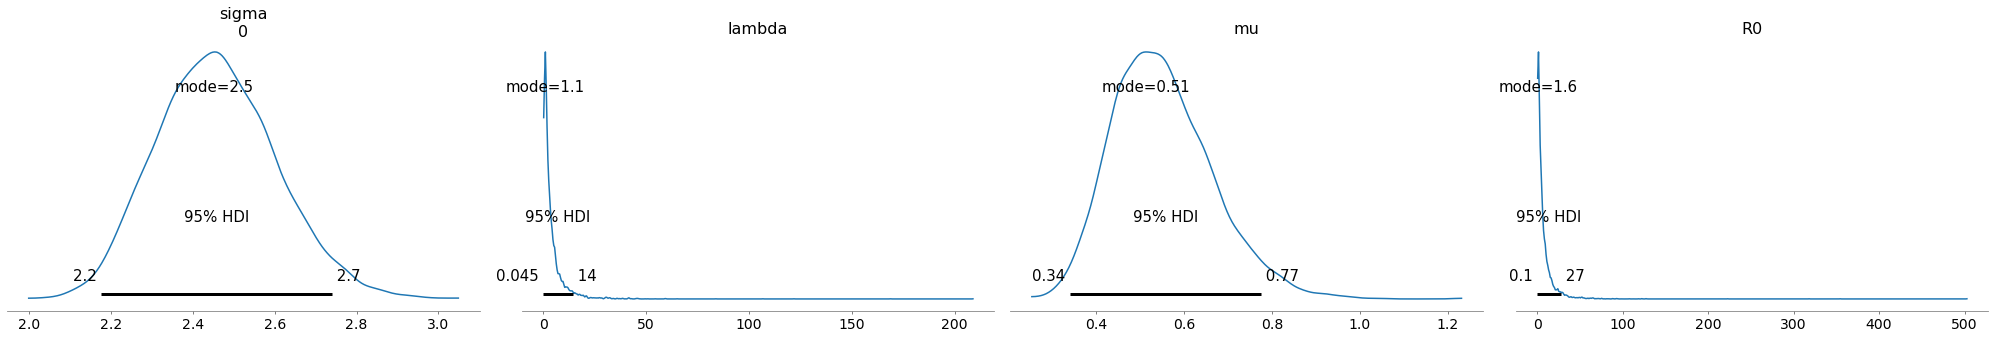

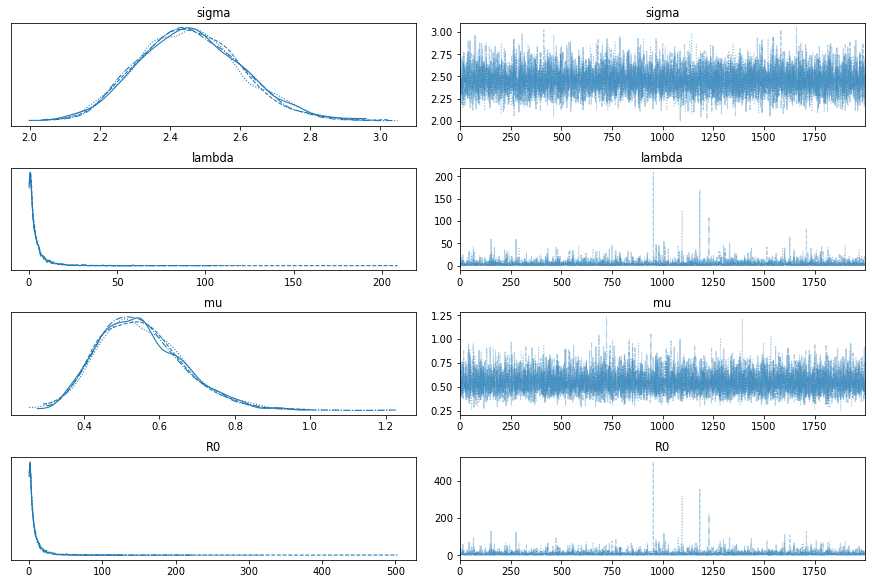

In [0]:
covid_obj = COVID_data('US', Population=328.2e6)
covid_obj.get_dates(data_begin='1/1/21', data_end='5/31/21')

# sunodeを使用
sir_model = SIR_model_sunode(covid_obj)
# 尤度分布
likelihood = {'distribution': 'lognormal', 
              'sigma': 2}
# 事前確率
prior = {'lam': 1.0, 
         'mu': 0.5, 
         'lambda_std': 1.0,
         'mu_std': 0.2 }

# R0(基本再生産数)の分布をヒストグラム、曲線、ラグプロット形式で取得
fig1 = sir_model.run_SIR_model(n_samples=2000, n_tune=1000, likelihood=likelihood, prior=prior)

R0(基本再生産数)の分布をヒストグラム、曲線、ラグプロット形式で表示

In [0]:
fig1.show()

# END